In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('Auto_Insurance_Claims_Sample.csv')

In [10]:
for i in df.columns:
    print(i, df[i].loc[0])

Customer BU79786
Country US
State Code KS
State Kansas
Claim Amount 276.35192789999996
Response No
Coverage Basic
Education Bachelor
Effective To Date 2/24/11
EmploymentStatus Employed
Gender F
Income 56274
Location Code Suburban
Marital Status Married
Monthly Premium Auto 69
Months Since Last Claim 32
Months Since Policy Inception 5
Number of Open Complaints 0
Number of Policies 1
Policy Type Corporate Auto
Policy Corporate L3
Claim Reason Collision
Sales Channel Agent
Total Claim Amount 384.811147
Vehicle Class Two-Door Car
Vehicle Size Medsize


In [29]:
quant = list(df.select_dtypes(include='int64').columns) + list(df.select_dtypes(include='float64').columns)
qual = ['Customer', 'Country', 'State Code', 'State','Response', 'Coverage', 'Education','Effective To Date','EmploymentStatus', 'Gender', 'Location Code','Marital Status','Policy Type', 'Policy', 'Claim Reason','Sales Channel','Vehicle Class', 'Vehicle Size'] 

In [ ]:
['Claim Amount', 'Coverage','Effective To Date', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies','Policy Type','Claim Reason','Total Claim Amount',]

In [101]:
df1 = df.drop(columns =['Customer', 'Claim Amount','Response','Claim Reason','Total Claim Amount','Effective To Date'])

df1 = pd.concat([df1.drop(columns = ['Country', 'State Code', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender','Location Code','Marital Status','Policy Type', 'Policy', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']),pd.get_dummies(df1[['State Code', 'State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender','Location Code','Marital Status','Policy Type', 'Policy', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']])],axis = 1)

In [47]:
df1

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State Code_IA,State Code_KS,State Code_MO,State Code_NE,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,0,8,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,7,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
9130,21604,79,14,28,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,85,9,37,3,2,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,21941,96,34,3,0,3,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [86]:
df1.groupby('State').mean()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
State,,,,,,
Iowa,37557.283353,93.763937,14.891196,48.237985,0.363706,2.973856
Kansas,38122.733083,92.031328,15.562657,49.229323,0.412281,2.928571
Missouri,37558.946667,93.495238,15.082540,47.648889,0.382540,2.967619
Nebraska,37405.402231,91.884909,15.097475,47.781562,0.383441,3.067528
Oklahoma,38369.605442,94.278912,15.333333,48.530612,0.428571,2.776644


In [94]:
df1 = df1.drop(columns = 'State')

In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df1_scaled = sc.fit_transform(df1[['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies']])
df1_scaled = pd.DataFrame(df1_scaled, columns = df1[['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies']].columns)
df1_final = pd.concat([df1_scaled,pd.get_dummies(df1[['State Code', 'State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender','Location Code','Marital Status','Policy Type', 'Policy', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']])],axis = 1)

In [105]:
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters = 2) 
km2.fit(df1_final)

KMeans(n_clusters=2)

In [62]:
km2.cluster_centers_.shape

(2, 62)

In [106]:
new = pd.concat([pd.DataFrame(df1_final),pd.DataFrame({'Class':km2.predict(df1_final)})],axis = 1)

In [107]:
new.groupby('Class').mean()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State Code_IA,State Code_KS,State Code_MO,State Code_NE,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Class,,,,,,,,,,,,,,,,,,,,,
0,0.649586,-0.016028,-0.007707,0.000176,0.008678,-0.001676,0.285119,0.087618,0.342324,0.18664,...,0.141383,0.514482,0.019189,0.018646,0.187726,0.046886,0.213070,0.097574,0.710717,0.191709
1,-0.993993,0.024527,0.011793,-0.000270,-0.013280,0.002564,0.284211,0.086981,0.348753,0.18615,...,0.150693,0.492798,0.015789,0.022438,0.210249,0.062327,0.196399,0.112742,0.691967,0.195291


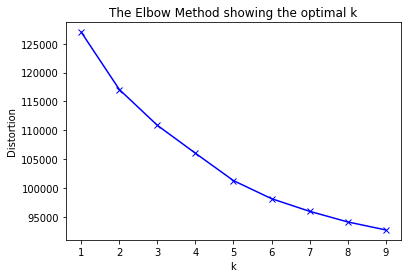

In [109]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df1_final)
    kmeanModel.fit(df1_final)
    #distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [110]:
km6 = KMeans(n_clusters = 6) 
km6.fit(df1_final)

KMeans(n_clusters=6)

In [111]:
new6 = pd.concat([pd.DataFrame(df1_final),pd.DataFrame({'Class':km6.predict(df1_final)})],axis = 1)

In [112]:
new6.groupby('Class').mean()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State Code_IA,State Code_KS,State Code_MO,State Code_NE,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.051488,-0.197939,-0.012438,-0.056836,-0.211950,1.901055,0.289340,0.088470,0.343002,0.195794,...,0.143582,0.542422,0.000000,0.000000,0.174764,0.056563,0.226251,0.095722,0.699057,0.205221
1,0.099027,-0.162304,0.021608,0.019568,2.949004,-0.041152,0.264368,0.091954,0.326149,0.205460,...,0.143678,0.551724,0.007184,0.000000,0.172414,0.045977,0.222701,0.106322,0.712644,0.181034
2,0.610468,-0.171389,0.172601,-0.906954,-0.261136,-0.406726,0.267160,0.086420,0.361975,0.177778,...,0.143210,0.527901,0.000000,0.000000,0.210370,0.040000,0.221728,0.101235,0.727407,0.171358
3,-1.052574,-0.153225,0.016178,0.013801,-0.246309,-0.373490,0.288296,0.085010,0.343737,0.190144,...,0.143737,0.530595,0.000000,0.000000,0.214374,0.056263,0.198768,0.110883,0.689528,0.199589
4,-0.047679,3.101027,0.062881,0.056523,-0.077449,-0.048143,0.307847,0.076459,0.352113,0.167002,...,0.173038,0.000000,0.317907,0.370221,0.225352,0.086519,0.000000,0.088531,0.704225,0.207243
5,0.643480,-0.207005,-0.198882,0.875187,-0.282194,-0.397678,0.295909,0.091342,0.335395,0.182683,...,0.143197,0.536632,0.000000,0.000000,0.178402,0.053758,0.231208,0.105138,0.695528,0.199334


In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components = 3)
new